In [1]:
import xarray as xa
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def is_monsoon_precip(month):
    return (month <= 9) & (month >= 6)

NAM_sub = xa.open_dataarray('NAM_sub_precip')
NAM_sub = NAM_sub.sel(time=is_monsoon_precip(NAM_sub.time.dt.month))
NAM_sub = NAM_sub.sel(time=(NAM_sub.time.dt.year < 2019))
print(NAM_sub)

<xarray.DataArray (time: 4880, sub_id: 7)>
array([[0.000000e+00, 0.000000e+00, 3.446712e-03, ..., 2.297440e+00,
        0.000000e+00, 1.477329e-01],
       [6.603117e-04, 1.142185e-01, 0.000000e+00, ..., 3.378262e+00,
        2.724096e-02, 1.126714e+00],
       [9.099279e-04, 1.587643e-01, 7.554461e-03, ..., 2.928377e+00,
        2.651184e+00, 1.452759e+00],
       ...,
       [2.856658e+00, 0.000000e+00, 0.000000e+00, ..., 5.494231e-04,
        3.873349e-04, 5.328866e+00],
       [5.062993e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 6.166514e+00],
       [9.245623e-01, 0.000000e+00, 0.000000e+00, ..., 2.755558e-04,
        9.065355e-01, 4.484083e+00]])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2018-09-30
  * sub_id   (sub_id) int64 1 2 3 4 5 6 7


1 21.363590636973544   5.9890645439901045 3.2129119886528876
2 7.98353434112839   2.985675308046312 2.107488467464926
3 7.630975120843042   2.927215037195531 2.069174491996436
4 6.2968948209451305   2.6969909225634123 2.0803047667360968
5 6.469523059079158   2.8676834305801715 2.334848754959447
6 10.647874758983226   4.09871437161252 2.980553511223805
7 17.252742222601025   6.41186690131609 4.551621188552907


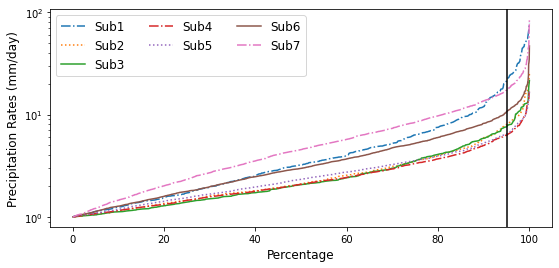

In [3]:
linestyles=['-', '-.', ':']
fig = plt.figure(figsize=(9, 4))
for sub_id in range(1, 8):
    sub_precip = NAM_sub.sel(sub_id=sub_id).data
    sub_precip = sub_precip[sub_precip>1]
    print(sub_id, np.quantile(sub_precip, .95), ' ', np.mean(sub_precip), np.median(sub_precip))
    sort = np.sort(sub_precip)[::]
    exceedence = np.arange(1.,len(sort)+1) / len(sort)
    plt.plot(exceedence*100, sort, label='Sub'+str(sub_id), linestyle=linestyles[sub_id%3])
plt.axvline(x=95, ymin=0, ymax=1, color='black')
plt.legend(fontsize=12, ncol=3)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Precipitation Rates (mm/day)', fontsize=12)
plt.savefig('PrecipCurves.png', bbox_inches='tight')
plt.show()

1 21.363590636973544   5.9890645439901045
2 7.98353434112839   2.985675308046312
3 7.630975120843042   2.927215037195531
4 6.2968948209451305   2.6969909225634123
5 6.469523059079158   2.8676834305801715
6 10.647874758983226   4.09871437161252
7 17.252742222601025   6.41186690131609


AttributeError: 'Figure' object has no attribute 'supylabel'

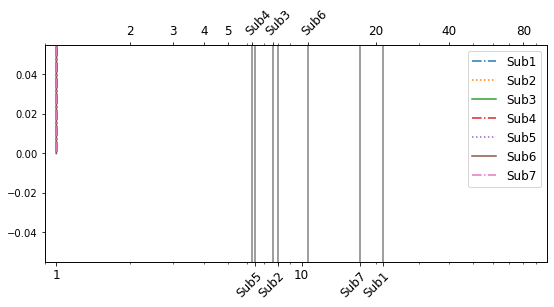

In [4]:
linestyles=['-', '-.', ':']
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
for sub_id in range(1, 8):
    sub_precip = NAM_sub.sel(sub_id=sub_id).data
    sub_precip = sub_precip[sub_precip>1]
    print(sub_id, np.quantile(sub_precip, .95), ' ', np.mean(sub_precip))
    sort = np.sort(sub_precip)[::-1]
    exceedence = 1-np.arange(1.,len(sort)+1) / len(sort)
    plt.plot(sort, exceedence*100, label='Sub'+str(sub_id), linestyle=linestyles[sub_id%3])
    ax1.axvline(x=np.quantile(sub_precip, .95), ymin=0, ymax=1, color='black', alpha=0.5)
# plt.axvline(x=95, ymin=0, ymax=1, color='black')
plt.axhline(y=95, xmin=0, xmax=1, color='black')
plt.legend(fontsize=12, ncol=1)
# plt.yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim([.9, 100])
ax2.set_xlim([.9, 100])
ax1.set_xticks([1, 10, 21.3636, 7.983, 6.470, 17.253])
ax1.set_xticklabels(['1', '10', 'Sub1', 'Sub2', 'Sub5', 'Sub7'], rotation=45, ha="right", rotation_mode='anchor', fontsize=12)
ticks = ax1.get_xticklabels()
ticks[0].set_rotation(0)
ticks[1].set_rotation(0)
ticks[0].set_horizontalalignment("center")
ticks[1].set_horizontalalignment("center")
ax2.set_xticks([2, 3, 4, 5, 20, 40, 80, 7.631, 6.29689, 10.648])
ax2.set_xticklabels(['2', '3', '4', '5', '20', '40', '80', 'Sub3', 'Sub4', 'Sub6'], rotation=45, ha="left", rotation_mode='anchor', fontsize=12)
ticks = ax2.get_xticklabels()
for i in range(7):
    ticks[i].set_rotation(0)
    ticks[i].set_horizontalalignment("center")
fig.supylabel('Percentile', fontsize=12, x=0.06)
fig.supxlabel('Precipitation Rates (mm/day)', fontsize=12, y=-0.08)
plt.savefig('PrecipCurves.png', bbox_inches='tight')
plt.show()

In [22]:
import matplotlib
print(matplotlib.__version__)

3.5.2


In [40]:
ticks[5]

Text(21.3636, 0, 'Sub1')